In [46]:
import numpy as np
from numpy import ndarray
from typing import Callable, Dict, Tuple, List

In [47]:
# Linear Regression
def forward_linear_regression(X_batch: ndarray, y_batch: ndarray, weights: Dict[str, ndarray]) -> Tuple[float, Dict[str, ndarray]]:
    assert X_batch.shape[0] == y_batch.shape[0], "X and y batches number of rows do not match"
    assert X_batch.shape[1] == weights["W"].shape[0], "X batch number of columns and weights number of rows do not match"
    assert weights["B"].shape[0] == weights["W"].shape[1] == 1, "B number of rows and W number of columns different from 1"

    N = np.dot(X_batch, weights["W"])
    P = N + weights["B"]
    loss = np.mean(np.power(y_batch - P, 2))

    # save the information computed on the forward pass
    forward_info = {
        "X": X_batch,
        "N": N,
        "P": P,
        "y": y_batch,
    }

    return loss, forward_info

X_batch = np.array([
    [0, 1, 2], # X1
    [3, 4, 5], # X2
    [5, 6, 7], # X3
])

weights = {
    # "B": np.array([[2], [2], [2]]),
    "B": np.array([[2]]), # will be broadcasted (?) as if np.array([[2], [2], [2]])
    # "B": np.array([2]), # will be broadcasted (?) as if np.array([[2], [2], [2]])
    "W": np.array([
        # W1
        [1], 
        [2], 
        [3],
    ]),
}

y_batch = np.array([
    [11],
    [27],
    [41],
])

loss, forward_info = forward_linear_regression(X_batch, y_batch, weights)
loss, forward_info

(1.0,
 {'X': array([[0, 1, 2],
         [3, 4, 5],
         [5, 6, 7]]),
  'N': array([[ 8],
         [26],
         [38]]),
  'P': array([[10],
         [28],
         [40]]),
  'y': array([[11],
         [27],
         [41]])})

In [48]:
# Calculating the Gradients
def loss_gradients(forward_info: Dict[str, ndarray], weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    dLdP = -2 * (forward_info["y"] - forward_info["P"])
    dPdN = np.ones_like(forward_info["N"])
    dLdN = dLdP * dPdN
    dNdW = np.transpose(forward_info["X"])
    dLdW = np.dot(dNdW, dLdN)

    dPdB = np.ones_like(weights["B"])
    dLdB = dLdP * dPdB
    B = dLdB.sum(axis=0) # axis sum due to 1-dim B (?)

    # intermdiate results added to B and W for debugging purposes
    loss_gradients = {
        "dLdP": dLdP,
        "dPdN": dPdN,
        "dLdN": dLdN,
        "dNdW": dNdW,
        "W": dLdW,
        "dPdB": dPdB,
        "dLdB": dLdB,
        "B": B, 
    }
    return loss_gradients

loss_gradients(forward_info, weights)

{'dLdP': array([[-2],
        [ 2],
        [-2]]),
 'dPdN': array([[1],
        [1],
        [1]]),
 'dLdN': array([[-2],
        [ 2],
        [-2]]),
 'dNdW': array([[0, 3, 5],
        [1, 4, 6],
        [2, 5, 7]]),
 'W': array([[-4],
        [-6],
        [-8]]),
 'dPdB': array([[1]]),
 'dLdB': array([[-2],
        [ 2],
        [-2]]),
 'B': array([-2])}

In [49]:
# Using These Gradients to Train the Model
def init_weights(n_in: int) -> Dict[str, ndarray]:
    weights = {
    "W": np.random.randn(n_in, 1),
    "B": np.random.randn(1, 1),
    }
    return weights

init_weights(3)   

{'W': array([[ 0.32291096],
        [-1.61019269],
        [-0.83644989]]),
 'B': array([[0.39131454]])}

In [50]:
def permute_data(X: ndarray, y: ndarray):
    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm], perm

X = np.array([
    [0, 1, 2], # X1
    [3, 4, 5], # X2
    [5, 6, 7], # X3
])

y = np.array([
    [11],
    [27],
    [41],
])

permute_data(X, y)

(array([[5, 6, 7],
        [0, 1, 2],
        [3, 4, 5]]),
 array([[41],
        [11],
        [27]]),
 array([2, 0, 1]))

In [51]:
Batch = Tuple[ndarray, ndarray]

def generate_batch(X: ndarray, y: ndarray, start: int = 0, batch_size: int = 10) -> Batch:
    assert X.ndim == y.ndim == 2, "X and Y must be 2 dimensional"
    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start    
    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]    
    return X_batch, y_batch
    
X = np.array([
    [0, 1, 2], # X1
    [3, 4, 5], # X2
    [5, 6, 7], # X3
])

y = np.array([
    [11],
    [27],
    [41],
])

generate_batch(X, y, 0, 2)

(array([[0, 1, 2],
        [3, 4, 5]]),
 array([[11],
        [27]]))

In [52]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names
data[0:3], target[0:3], features[0:3]

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
         1.5300e+01, 3.9690e+02, 4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9283e+02, 4.0300e+00]]),
 array([24. , 21.6, 34.7]),
 array(['CRIM', 'ZN', 'INDUS'], dtype='<U7'))

In [53]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)
data[0:3]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ]])

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)
X_train[0:3], X_test[0:3], y_train[0:3], y_test[0:3]

(array([[-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
          1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
          0.1130321 ,  0.44105193, -1.02650148],
        [ 5.53032093, -0.48772236,  1.01599907, -0.27259857,  0.36544404,
         -0.75169891,  1.11749449, -1.13234958,  1.66124525,  1.53092646,
          0.80657583, -3.88219457, -0.3564708 ],
        [ 9.9339306 , -0.48772236,  1.01599907, -0.27259857,  1.00468047,
          0.97356275,  0.82945385, -1.13068579,  1.66124525,  1.53092646,
          0.80657583,  0.44105193,  0.63876307]]),
 array([[-0.41643272,  3.5896366 , -1.23392304, -0.27259857, -1.19722987,
          2.23438568, -1.25795172,  0.62889308, -0.6379618 , -1.09423658,
         -1.73641788,  0.39587878, -1.23956563],
        [ 1.65868822, -0.48772236,  1.01599907, -0.27259857,  1.00468047,
         -0.08780796,  1.11749449, -1.14513701,  1.66124525,  1.53092646,
          0.80657583,  0.40640456,  1.27935726],
        [ 0.2

In [55]:
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)
y_train[0:3], y_test[0:3]

(array([[36.2],
        [15. ],
        [10.4]]),
 array([[48.5],
        [10.2],
        [15.2]]))

In [56]:
def train(X: ndarray, 
          y: ndarray, 
          n_iter: int = 1000,
          learning_rate: float = 0.001,
          batch_size: int = 100,
          return_losses: bool = True, 
          return_weights: bool = True, 
          seed: int = 1) -> None:
    if seed:
        np.random.seed(seed)
    start = 0
    weights = init_weights(X.shape[1])
    X, y, dummy = permute_data(X, y)
    losses = []
    for i in range(n_iter):
        if start >= X.shape[0]:
            X, y, dummy = permute_data(X, y)
            start = 0
        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size
        loss, forward_info = forward_linear_regression(X_batch, y_batch, weights)
        if return_losses:
            losses.append(loss)
        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]
    
    if return_weights:
        return losses, weights

train_info = train(X_train, y_train, n_iter = 1000, batch_size=23, seed=180708)
losses, weights = train_info
losses[0:3], "...", losses[-3:], weights

([813.2098258057695, 707.3600829629216, 419.780274960034],
 '...',
 [36.717795915470546, 14.400552796770944, 12.46628339805241],
 {'W': array([[-1.09542534],
         [ 0.73529155],
         [ 0.19771754],
         [ 0.74750455],
         [-2.28494893],
         [ 2.20059621],
         [ 0.7194554 ],
         [-2.6384484 ],
         [ 2.53576919],
         [-1.68915096],
         [-2.31624663],
         [ 0.84352868],
         [-4.25526828]]),
  'B': array([[22.63115155]])})

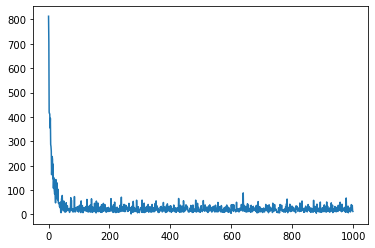

In [57]:
import matplotlib.pyplot as plt
plt.plot(list(range(1000)), losses)

In [58]:
# Assessing Our Model
def predict(X: ndarray, weights: Dict[str, ndarray]):
    N = np.dot(X, weights["W"])
    P = N + weights["B"]
    return P

preds = predict(X_test, weights)
preds[0:3]

array([[40.22846109],
       [16.44632103],
       [19.35425437]])

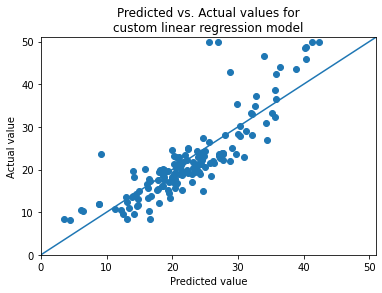

In [59]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

In [60]:
def mae(preds: ndarray, actuals: ndarray):
    return np.mean(np.abs(preds - actuals))
    
"Mean absolute error", round(mae(preds, y_test), 4)

('Mean absolute error', 3.5644)

In [61]:
def rmse(preds: ndarray, actuals: ndarray):
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

"Root mean squared error", round(rmse(preds, y_test), 4)

('Root mean squared error', 5.0497)

In [62]:
"Mean", np.round(y_test.mean(), 4)

('Mean', 22.0776)

In [63]:
"RMSE / Mean", np.round(rmse(preds, y_test) / y_test.mean(), 4)

('RMSE / Mean', 0.2287)

In [64]:
"Weights", np.round(weights['W'].reshape(-1), 4)

('Weights',
 array([-1.0954,  0.7353,  0.1977,  0.7475, -2.2849,  2.2006,  0.7195,
        -2.6384,  2.5358, -1.6892, -2.3162,  0.8435, -4.2553]))

In [65]:
# Analyzing the Most Important Feature
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis=0, keepdims=True), NUM, axis=0) # weights average excluding last one (the most important)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)
test_feature = np.concatenate([a, b], axis=1)
X_test[0:3], a[0:3], b[0:3], test_feature[0:3], test_feature[0:3, -1]

(array([[-0.41643272,  3.5896366 , -1.23392304, -0.27259857, -1.19722987,
          2.23438568, -1.25795172,  0.62889308, -0.6379618 , -1.09423658,
         -1.73641788,  0.39587878, -1.23956563],
        [ 1.65868822, -0.48772236,  1.01599907, -0.27259857,  1.00468047,
         -0.08780796,  1.11749449, -1.14513701,  1.66124525,  1.53092646,
          0.80657583,  0.40640456,  1.27935726],
        [ 0.21268563, -0.48772236,  1.01599907, -0.27259857,  1.36749033,
          0.52764458,  1.05348546, -0.68445678,  1.66124525,  1.53092646,
          0.80657583, -0.01517502,  0.71165343]]),
 array([[-0.00941651,  0.00980579, -0.00817894,  0.09038795,  0.0453655 ,
         -0.03046545,  0.01654386, -0.01880801,  0.01095914,  0.00738318,
          0.050674  ,  0.03445097],
        [-0.00941651,  0.00980579, -0.00817894,  0.09038795,  0.0453655 ,
         -0.03046545,  0.01654386, -0.01880801,  0.01095914,  0.00738318,
          0.050674  ,  0.03445097],
        [-0.00941651,  0.00980579, -0.0

In [66]:
test_preds = predict(test_feature, weights)[:, 0]
test_preds[0:3]

array([28.91535942, 28.36981221, 27.82426499])

Text(0.5, 1.0, 'Most important feature vs. target and predictions,\n custom linear regression')

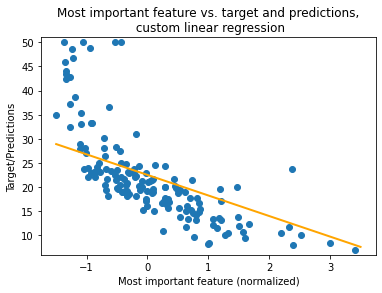

In [67]:
plt.scatter(X_test[:, 12], y_test)
plt.plot(test_feature[:, -1], test_preds, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n custom linear regression")